In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import ellipkinc, ellipj

M = 1

In [89]:
def get_gamma(alpha, theta):
    alpha, theta = np.deg2rad(alpha), np.deg2rad(theta)

    if theta == 0:
        return np.pi/2

    return np.arccos(np.cos(alpha) / np.sqrt(np.cos(alpha)**2 + 1/np.tan(theta)**2))

def get_radius(P, alpha, theta, debug=False):
    assert P >= 3*M, "Closest approach must be greater than 3*M."

    alpha, theta = np.deg2rad(alpha), np.deg2rad(theta)

    Q = np.sqrt((P - 2 * M) * (P + 6 * M))
    gamma = get_gamma(alpha, theta)

    term_1 = (Q - P + 2*M) / (4*M*P)
    term_2 = (Q - P + 6*M) / (4*M*P)

    k_squared = (Q - P + 6*M) / (2*Q)

    sin_squared_zeta = (Q - P + 2*M) / (Q - P + 6*M)
    zeta = np.arcsin(np.sqrt(sin_squared_zeta))

    F = ellipkinc(zeta, k_squared)
    u = gamma/2 * np.sqrt(P/Q) + F
    sn, _, _, _ = ellipj(u, k_squared)

    if debug:
        print(f"Q: {Q}")
        print(f"gamma: {gamma}")
        print(f"term_1: {term_1}")
        print(f"term_2: {term_2}")
        print(f"k^2: {k_squared}")
        print(f"zeta: {zeta}")
        print(f"F: {F}")
        print(f"u: {u}")   
        print(f"sn: {sn}")

    return 1 / (-term_1 + term_2 * sn**2)

def get_impact_parameter(P):
    return P**3 / (P - 2*M)

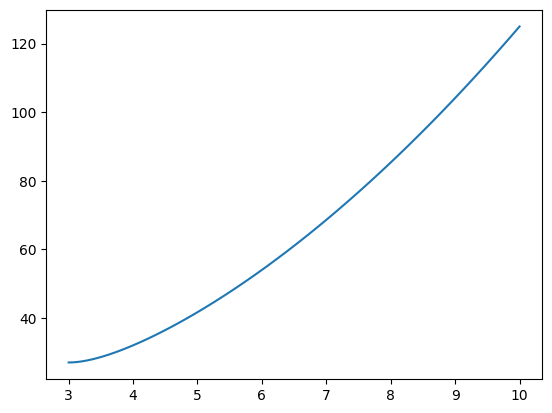

In [99]:
x = np.linspace(3*M, 10*M, 100)

plt.plot(
    x,
    get_impact_parameter(x),
)

plt.show()

# solve get_impact_parameter for P 
# put P into get_radius
